<a href="https://colab.research.google.com/github/AvigyanChowdhury/Financial-Fraud-Detection-in-Bitcoin-Networks-using-Ensemble-Deep-Learning/blob/main/Blockchain_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
!pip install imbalanced-learn


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access files in your Google Drive
data_path = '/content/drive/MyDrive/data/final_dataset.csv'

In [ ]:

df = pd.read_csv(data_path)
df

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
0,1,1,7.919500,7.914000,15.833500,7.919500,7.914000,0
1,2,2,0.089590,0.089090,0.178680,0.044795,0.044545,0
2,1,2,0.010000,0.009000,0.019000,0.010000,0.004500,0
3,3,2,0.015433,0.014933,0.030367,0.005144,0.007467,0
4,1,2,0.041253,0.040753,0.082007,0.041253,0.020377,0
...,...,...,...,...,...,...,...,...
30348102,1,2,1.456385,1.455885,2.912270,1.456385,0.727943,0
30348103,1,2,9.289165,9.288165,18.577331,9.289165,4.644083,0
30348104,4,2,0.371120,0.369920,0.741039,0.092780,0.184960,0
30348105,2,2,0.863227,0.862227,1.725454,0.431614,0.431114,0


In [ ]:
count_1_labels = df['out_and_tx_malicious'].sum()
print("Number of 1 labels:", count_1_labels)

Number of 1 labels: 100081


In [ ]:
count_0_labels = (df['out_and_tx_malicious'] == 0).sum()
print("Number of 0 labels:", count_0_labels)

Number of 0 labels: 30248026


In [ ]:


# Assuming your original dataset is named 'df'
# Create separate dataframes for each class
df_class_0 = df[df['out_and_tx_malicious'] == 0]
df_class_1 = df[df['out_and_tx_malicious'] == 1]

# Randomly sample 8000 rows from each class
sample_size = 100081
df_sampled_class_0 = df_class_0.sample(n=sample_size, random_state=42)
df_sampled_class_1 = df_class_1.sample(n=sample_size, random_state=42)

# Concatenate the sampled dataframes to create the new balanced dataset
df_balanced = pd.concat([df_sampled_class_0, df_sampled_class_1], ignore_index=True)

# Shuffle the new dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Now df_balanced contains 5000 rows of each class, resulting in a balanced dataset


In [ ]:
df_balanced

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
0,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
1,1,2,28.020000,28.020000,56.040000,28.020000,14.010000,0
2,1,1,21.926000,21.916000,43.842000,21.926000,21.916000,0
3,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
4,0,0,178.306508,27.711686,206.018195,178.306508,27.711686,1
...,...,...,...,...,...,...,...,...
200157,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
200158,0,0,299.564377,12.554453,312.118829,299.564377,12.554453,1
200159,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
200160,1,0,246.366265,21.947676,268.313941,246.366265,10.973838,1


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200162 entries, 0 to 200161
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   indegree              200162 non-null  int64  
 1   outdegree             200162 non-null  int64  
 2   in_btc                200162 non-null  float64
 3   out_btc               200162 non-null  float64
 4   total_btc             200162 non-null  float64
 5   mean_in_btc           200162 non-null  float64
 6   mean_out_btc          200162 non-null  float64
 7   out_and_tx_malicious  200162 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 12.2 MB


In [ ]:

df1=df_balanced
df1

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
0,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
1,1,2,28.020000,28.020000,56.040000,28.020000,14.010000,0
2,1,1,21.926000,21.916000,43.842000,21.926000,21.916000,0
3,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
4,0,0,178.306508,27.711686,206.018195,178.306508,27.711686,1
...,...,...,...,...,...,...,...,...
200157,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
200158,0,0,299.564377,12.554453,312.118829,299.564377,12.554453,1
200159,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
200160,1,0,246.366265,21.947676,268.313941,246.366265,10.973838,1


In [ ]:
count=0
for i in df_balanced["out_and_tx_malicious"]:
    if i==1:
        count+=1

count

100081

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X=df1.drop(["out_and_tx_malicious"],axis=1)
y=df1["out_and_tx_malicious"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
# X_test

array([[-0.31625021, -0.1694594 , -0.23660417, ..., -0.2035638 ,
        -0.07179803, -0.18283726],
       [-0.23849132,  0.15806538, -0.23660292, ..., -0.23542695,
        -0.07179593, -0.28442919],
       [ 1.62772197, -0.1694594 , -0.17463793, ..., -0.17231876,
        -0.06762974, -0.18382416],
       ...,
       [-0.23849132,  0.15806538, -0.23535269, ..., -0.23415366,
        -0.06969344, -0.28341428],
       [-0.23849132,  0.15806538, -0.22063526, ..., -0.21917084,
        -0.04494346, -0.27147666],
       [ 0.228062  ,  0.48559017, -0.2283194 , ..., -0.22699058,
        -0.0698077 , -0.27994637]])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming you have already fitted and transformed X_train using StandardScaler

# Create a MinMaxScaler instance
min_max_scaler = MinMaxScaler()

# Transform X_test using the MinMaxScaler
X_test = min_max_scaler.fit_transform(X_test)
X_train = min_max_scaler.fit_transform(X_train)

In [ ]:
X_test

array([[0.00000000e+00, 3.48432056e-03, 0.00000000e+00, ...,
        4.77882305e-04, 0.00000000e+00, 1.91152922e-03],
       [1.99600798e-03, 6.96864111e-03, 1.91152922e-08, ...,
        1.43362780e-08, 1.91152922e-08, 9.55764611e-09],
       [4.99001996e-02, 3.48432056e-03, 9.46480093e-04, ...,
        9.46480093e-04, 3.78592037e-05, 1.89296019e-03],
       ...,
       [1.99600798e-03, 6.96864111e-03, 1.91152922e-05, ...,
        1.91105132e-05, 1.91152922e-05, 1.91057346e-05],
       [1.99600798e-03, 6.96864111e-03, 2.43911129e-04, ...,
        2.43815552e-04, 2.43911129e-04, 2.43719976e-04],
       [1.39720559e-02, 1.04529617e-02, 1.26542684e-04, ...,
        1.26538861e-04, 1.80775263e-05, 8.43566919e-05]])

In [ ]:
y_train

190528    1
87429     1
140008    0
148284    1
113475    1
         ..
119879    1
103694    0
131932    0
146867    1
121958    1
Name: out_and_tx_malicious, Length: 140113, dtype: int64

In [ ]:
count =0
for i in y_train:
    if i ==1:
        count+=1
count

70145

In [ ]:
count =0
for i in y_test:
    if i ==1:
        count+=1
count

29936

Data Analysis

In [ ]:
# Perform Factor Analysis
from sklearn.decomposition import FactorAnalysis

factor_analysis = FactorAnalysis(n_components=3, random_state=10)
Xtrain_transformed = factor_analysis.fit_transform(X_train)

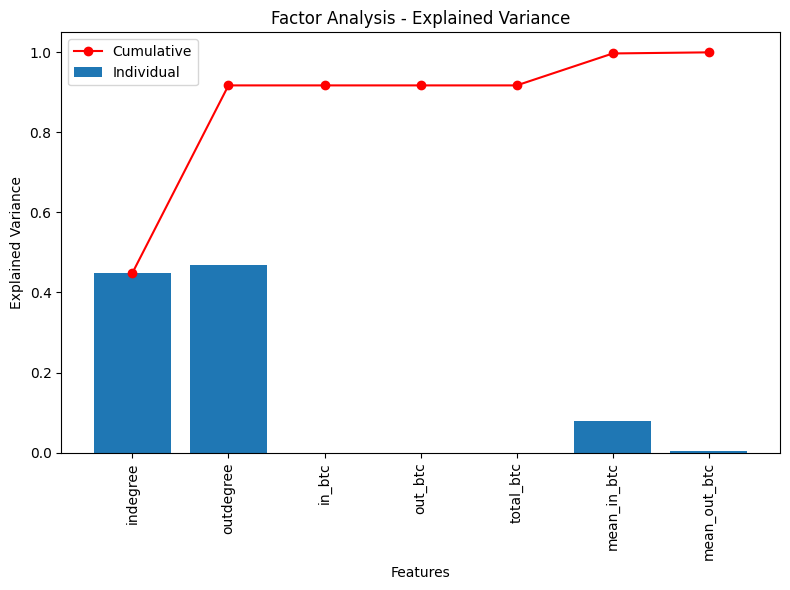

In [ ]:
# Get the column names for x-axis labels
x_labels = list(X.columns)

# Calculate eigenvalues and explained variance
eigenvalues = factor_analysis.noise_variance_
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot Factor Analysis
plt.figure(figsize=(8, 6))
x = np.arange(len(x_labels))
plt.bar(x, explained_variance, align='center', label='Individual')
plt.plot(x, cumulative_explained_variance, '-o', color='r', label='Cumulative')
plt.xticks(x, x_labels, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Explained Variance')
plt.title('Factor Analysis - Explained Variance')
plt.legend()
plt.tight_layout()
plt.show()

Heat Map

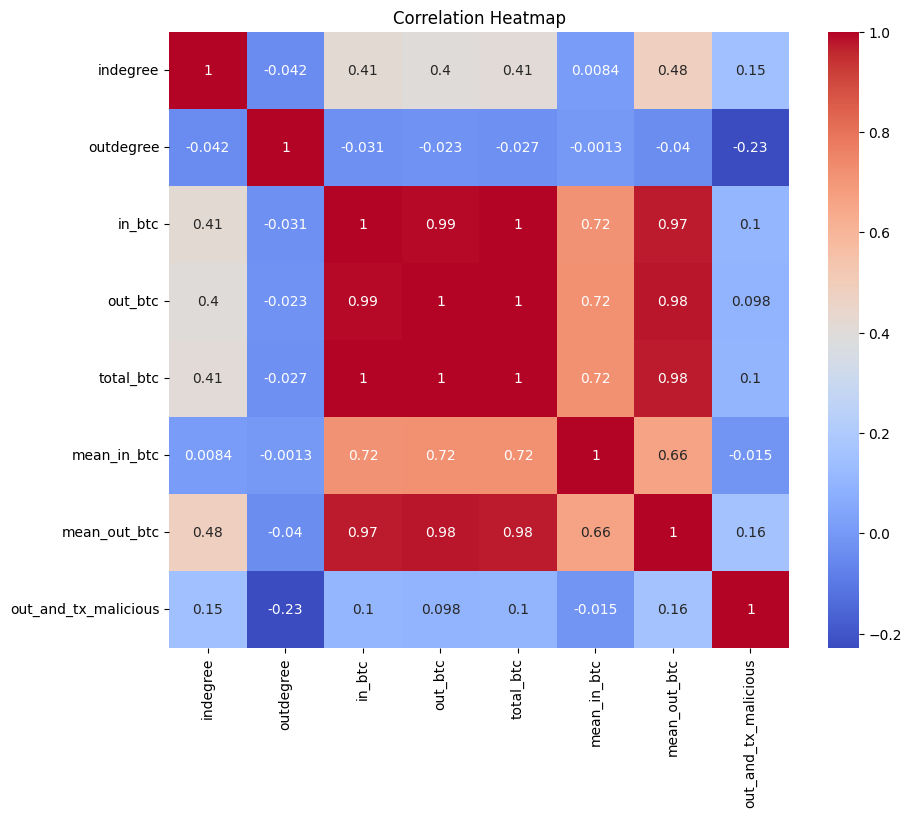

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_balanced.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test,y_test)

0.6100351379706573

In [ ]:
y_pred_prob_RF = model.predict(X_test)
y_pred_RF = (y_pred_prob_RF > 0.5).astype(int)

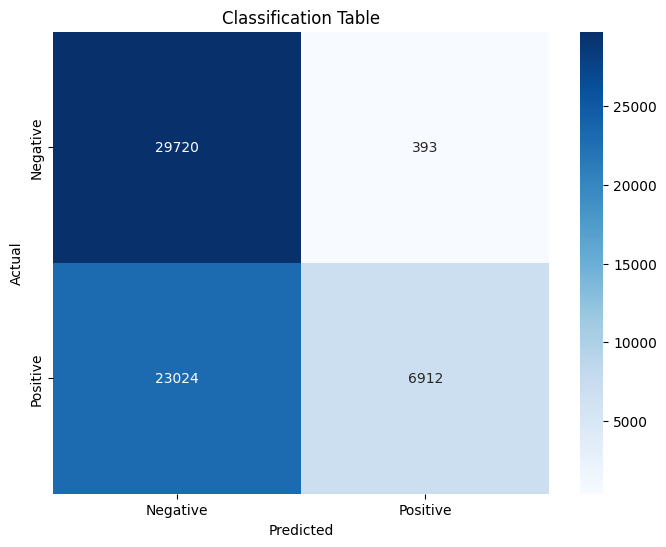

Precision: 0.9462012320328542
Recall: 0.23089257081774453
F1 Score: 0.3712037807792487
Accuracy: 0.61


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score , accuracy_score, classification_report


# Create a sample confusion matrix

cm = confusion_matrix(y_test, y_pred_RF)

# Create a classification table using seaborn
class_names = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Classification Table")
plt.show()

# Calculate precision, recall, and F1 score

precision = precision_score(y_test, y_pred_RF)
recall = recall_score(y_test, y_pred_RF)
f1 = f1_score(y_test, y_pred_RF)
accuracy = accuracy_score(y_test, y_pred_RF)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
4379/4379 [==============================] - 24s 4ms/step - loss: 0.2606 - accuracy: 0.8961
Epoch 2/5
4379/4379 [==============================] - 16s 4ms/step - loss: 0.0764 - accuracy: 0.9823
Epoch 3/5
4379/4379 [==============================] - 16s 4ms/step - loss: 0.0559 - accuracy: 0.9854
Epoch 4/5
4379/4379 [==============================] - 16s 4ms/step - loss: 0.0465 - accuracy: 0.9873
Epoch 5/5
4379/4379 [==============================] - 17s 4ms/step - loss: 0.0427 - accuracy: 0.9889


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

1877/1877 [==============================] - 3s 1ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [ ]:
# X_train.shape
# X_train.shape[1]

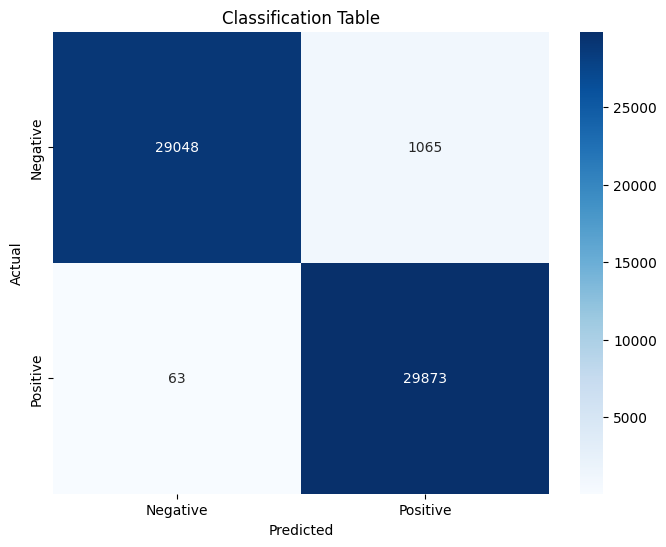

Precision: 0.9655763139181589
Recall: 0.9978955104222341
F1 Score: 0.9814699214771495


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a sample confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Create a classification table using seaborn
class_names = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Classification Table")
plt.show()

# Calculate precision, recall, and F1 score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



(LSTM,Attention,Dense)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.layers import Layer
import keras.backend as K

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

# Assuming you have your input sequences X_train with shape (num_samples, sequence_length, input_dim)
# and corresponding labels y_train

model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1],1), activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(AttentionLayer())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


NameError: ignored

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
1752/1752 [==============================] - 78s 22ms/step - loss: 0.6729 - accuracy: 0.5514 - val_loss: 0.6418 - val_accuracy: 0.5639
Epoch 2/10
1752/1752 [==============================] - 36s 21ms/step - loss: 0.2942 - accuracy: 0.8815 - val_loss: 0.1619 - val_accuracy: 0.9474
Epoch 3/10
1752/1752 [==============================] - 37s 21ms/step - loss: 0.1720 - accuracy: 0.9443 - val_loss: 0.1668 - val_accuracy: 0.9477
Epoch 4/10
1752/1752 [==============================] - 39s 22ms/step - loss: 0.1362 - accuracy: 0.9543 - val_loss: 0.0953 - val_accuracy: 0.9680
Epoch 5/10
1752/1752 [==============================] - 38s 22ms/step - loss: 0.1099 - accuracy: 0.9649 - val_loss: 0.0941 - val_accuracy: 0.9672
Epoch 6/10
1752/1752 [==============================] - 37s 21ms/step - loss: 0.1026 - accuracy: 0.9665 - val_loss: 0.0861 - val_accuracy: 0.9718
Epoch 7/10
1752/1752 [==============================] - 36s 21ms/step - loss: 0.1314 - accuracy: 0.9522 - val_loss: 0.1146 -

In [ ]:
y_pred_prob_Ensemble = model.predict(X_test)
y_pred_Ensemble = (y_pred_prob_Ensemble > 0.5).astype(int)

1877/1877 [==============================] - 6s 3ms/step


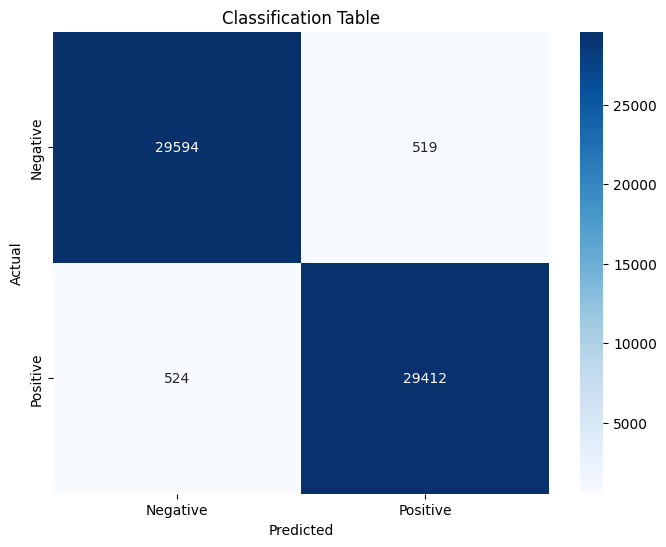

Precision: 0.9826601182720257
Recall: 0.9824959914484233
F1 Score: 0.9825780480064141
Accuracy: 0.98


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

# Create a sample confusion matrix

cm = confusion_matrix(y_test, y_pred_Ensemble)

# Create a classification table using seaborn
class_names = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Classification Table")
plt.show()

# Calculate precision, recall, and F1 score

precision = precision_score(y_test, y_pred_Ensemble)
recall = recall_score(y_test, y_pred_Ensemble)
f1 = f1_score(y_test, y_pred_Ensemble)
accuracy = accuracy_score(y_test, y_pred_Ensemble)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


print(f"Accuracy: {accuracy:.2f}")

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df_balanced' containing your data
df_balanced.to_csv('balanced_dataset.csv', index=False)

In [ ]:
import plotly.graph_objects as go

categories = ['Accuracy', 'Precision', 'Recall']

fig = go.Figure()

model_names = ['RF', 'MLP', 'ATT LSTM', 'Ensemble']
metric_values = [
    [0.61, 0.84, 0.23],  # RF
    [0.95, 0.96, 0.89],  # MLP
    [0.97, 0.98, 0.98,],  # ATT.LSTM
    [0.99, 0.98, 0.99]  # Ensemble
]
data_sizes = [50, 50, 50, 0]

border_colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(0, 0, 0)']

for idx, model_name in enumerate(model_names):
    # Complete the cycles by adding the first point at the end
    r_values = metric_values[idx] + [metric_values[idx][0]]
    theta_values = categories + [categories[0]]

    fig.add_trace(go.Scatterpolar(
        r=r_values,
        theta=theta_values,
        mode='lines+markers' if model_name != 'Data Size' else 'lines',  # Use markers for model data, lines only for Data Size
        line=dict(color=border_colors[idx], width=2),
        fill='none',  # Remove area fill for model data
        name=model_name
    ))

# Add grid lines with customized colors
for i, category in enumerate(categories):
    fig.add_trace(go.Scatterpolar(
        r=[1] * len(model_names),
        theta=[category] * len(model_names),
        mode='lines',
        line=dict(color='rgba(0, 0, 0, 0.2)', width=1),  # Set grid line color
        showlegend=False
    ))

# Add data size annotations
for idx, model_name in enumerate(model_names):
    fig.add_annotation(
        xref="paper",
        yref="paper",
        x=1.1,
        y=(idx + 1) / len(model_names),
        text=f"{model_name}",
        showarrow=False
    )
    if model_name == 'Data Size':
        fig.add_annotation(
            xref="paper",
            yref="paper",
            x=1.2,
            y=(idx + 1) / len(model_names),
            text=f"Data Size: {data_sizes[idx]}",
            showarrow=False
        )

# Add custom tick labels using annotations
for idx, tick_label in enumerate(['75%', '50%', '25%', '0%']):
    fig.add_annotation(
        x=0.5,
        y=1.05 - (idx * 0.25),
        text=tick_label,
        xref="paper",
        yref="paper",
        showarrow=False,
    )

    fig.add_annotation(
        x=1.05 - (idx * 0.25),
        y=0.5,
        text=tick_label,
        xref="paper",
        yref="paper",
        showarrow=False,
    )

    fig.add_annotation(
        x=0.5,
        y=-0.05 + (idx * 0.25),
        text=tick_label,
        xref="paper",
        yref="paper",
        showarrow=False,
    )

    fig.add_annotation(
        x=-0.05 + (idx * 0.25),
        y=0.5,
        text=tick_label,
        xref="paper",
        yref="paper",
        showarrow=False,
    )

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],  # Set the range according to your data
        ),
        angularaxis=dict(
            tickvals=list(range(len(categories))),
            ticktext=categories,
            rotation=90,  # Rotate the categories for better visibility
            showline=True,  # Show angular axis line
            showticklabels=False,  # Hide tick labels on angular axis
        )
    ),
    showlegend=True,
    title="Classification Scores",
    annotations=[
        dict(
            x=1.3,
            y=1,
            xref="paper",
            yref="paper",
            text="Model Info",
            showarrow=False
        )
    ],
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()